In [1]:
import io
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/content/drive/My Drive/MACHINE LEARNING/ML_Dataset_CO2Emission (1).csv')
print("Columns : ", df.columns)
df.describe()

Columns :  Index(['Engine_Size', 'Cylinders', 'Fuel_Consumption', 'CO2_Emissions'], dtype='object')


,Engine_Size,Cylinders,Fuel_Consumption,CO2_Emissions
count,1067.000000,1067.000000,1067.000000,1067.000000
mean,3.346298,5.794752,13.296532,256.228679
std,1.415895,1.797447,4.101253,63.372304
min,1.000000,3.000000,4.600000,108.000000
25%,2.000000,4.000000,10.250000,207.000000
50%,3.400000,6.000000,12.600000,251.000000
75%,4.300000,8.000000,15.550000,294.000000
max,8.400000,12.000000,30.200000,488.000000


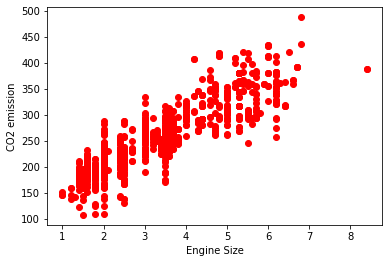

In [3]:
plt.xlabel('Engine Size')
plt.ylabel('CO2 emission')
plt.scatter(df.Engine_Size, df.CO2_Emissions, color = 'red')
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df, test_size =0.2, random_state=100)
print(training_data)
print(testing_data)

     Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
404          2.0          4              11.7            165
531          3.7          6              13.6            269
463          2.4          4              10.5            209
965          4.0          6              14.3            297
616          1.6          4               8.7            177
..           ...        ...               ...            ...
802          1.6          4               9.3            191
53           4.2          8              15.2            308
350          5.4          8              20.6            421
79           2.0          4               7.6            181
792          1.6          4               9.3            191

[853 rows x 4 columns]
     Engine_Size  Cylinders  Fuel_Consumption  CO2_Emissions
849          3.5          6              13.2            271
244          5.3          8              14.9            299
30           3.0          6              13.1            258


In [7]:
from sklearn import linear_model
slr = linear_model.LinearRegression()
train_X = np.asanyarray(training_data[['Engine_Size']])
train_y = np.asanyarray(training_data[['CO2_Emissions']])
slr.fit(train_X, train_y)
print("X coefficient : ",slr.coef_)
print("Y intercept : ",slr.intercept_)

X coefficient :  [[39.36976249]]
Y intercept :  [124.64169045]


Text(0, 0.5, 'CO2 Emissions')

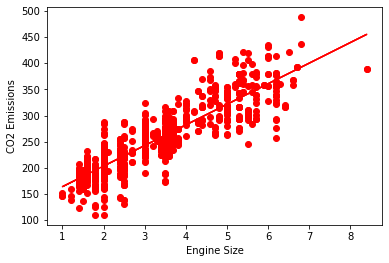

In [11]:
plt.scatter(training_data.Engine_Size, training_data.CO2_Emissions, color = 'red')
plt.plot(train_X, slr.coef_[0][0]*train_X + slr.intercept_[0], '-r')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')

In [12]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(testing_data[['Engine_Size']])
test_y = np.asanyarray(testing_data[['CO2_Emissions']])
test_y_ = slr.predict(test_x)
print("mean absolute error : %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print('residual sum of squares (MSE): %.2f' % np.mean((test_y_ - test_y))**2)
print('R2-score : &.2f' % r2_score(test_y, test_y_))

mean absolute error : 22.30
residual sum of squares (MSE): 0.60
R2-score : &.2f
